## Module import

In [1]:
# 기본 패키지
import pandas as pd
import numpy as np

# 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 
plt.style.use(['ggplot'])

# 한글 시각화시 필요 모듈
import platform # 사용자 운영체제 확인
platform.system()
## 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
## 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'


# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 


# 버전 확인
print('Pandas : %s'%(pd.__version__))
print('seaborn : %s'%(sns.__version__))
print('matplotlib : %s'%(matplotlib.__version__))
!python --version

Pandas : 1.2.1
seaborn : 0.11.1
matplotlib : 3.5.1
Python 3.8.13


## Load Data

In [112]:
loan = pd.read_csv('../data/loan_result.csv')
log = pd.read_csv('../data/log_data.csv')
user = pd.read_csv('../data/user_spec.csv')
# data 없으면 아래 코드 돌려서 생성
data = pd.read_csv('../data/data.csv')

## Train Test Split

In [ ]:
train_loan = loan[loan['is_applied'].isna() == False].reset_index(drop=True)
test_loan = loan[loan['is_applied'].isna()].reset_index(drop=True)

## 대출 이력이 있는 고객 feature 생성

In [3]:
# 대출이력이 있는 고객 feature 생성
loan_true = loan[loan['is_applied'] == 1]
loan_true_list = loan_true['application_id'].unique()

tempt = []

for i in range(len(user['application_id'])):
    if user['application_id'][i] in loan_true_list:
        tempt.append(1)
    else:
        tempt.append(0)

user['apply'] = tempt

In [4]:
# 데이터 병합
data = pd.merge(loan, user, on = "application_id")

In [5]:
data.to_csv("../data/data.csv")

In [6]:
user

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,apply
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0,0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0,0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0,0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0,0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN,1
1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,기타,자가,50000000.0,생활비,NaN,NaN,1.0,NaN,0
1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,정규직,자가,100000000.0,대환대출,NaN,NaN,8.0,200000000.0,0
1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,정규직,자가,10000000.0,대환대출,NaN,NaN,10.0,117000000.0,0


In [48]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394216 entries, 0 to 1394215
Data columns (total 18 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394216 non-null  int64  
 1   user_id                              1394216 non-null  int64  
 2   birth_year                           1381255 non-null  float64
 3   gender                               1381255 non-null  float64
 4   insert_time                          1394216 non-null  object 
 5   credit_score                         1289101 non-null  float64
 6   yearly_income                        1394126 non-null  float64
 7   income_type                          1394131 non-null  object 
 8   company_enter_month                  1222456 non-null  float64
 9   employment_type                      1394131 non-null  object 
 10  houseown_type                        1394131 non-null  object 
 11

## 데이터 확인

In [5]:
loan.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN


In [6]:
log.head()

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25


In [7]:
user.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0


In [ ]:
user.birth_year.value

In [10]:
print(user.groupby("employment_type")["desired_amount"].agg("mean").astype(int))
print(user.groupby("employment_type")["existing_loan_amt"].agg("mean").astype(int))

employment_type
계약직    25172031
기타     25378573
일용직    23691614
정규직    33074902
Name: desired_amount, dtype: int32
employment_type
계약직    49983702
기타     44665466
일용직    42120015
정규직    82834726
Name: existing_loan_amt, dtype: int32


In [24]:
# 고용형태별 대출목적

print(user.groupby(["employment_type","purpose"])["purpose"].agg("count").astype(int))

employment_type  purpose     
계약직              BUSINESS            32
                 BUYCAR              11
                 BUYHOUSE            29
                 ETC                 29
                 HOUSEDEPOSIT        59
                 INVEST              21
                 LIVING             865
                 SWITCHLOAN         159
                 기타                2100
                 대환대출             30442
                 사업자금              1948
                 생활비              70643
                 자동차구입              301
                 전월세보증금            2529
                 주택구입              1216
                 투자                1061
기타               BUSINESS           244
                 BUYCAR              26
                 BUYHOUSE            33
                 ETC                141
                 HOUSEDEPOSIT       104
                 INVEST              30
                 LIVING            2002
                 SWITCHLOAN         255
          

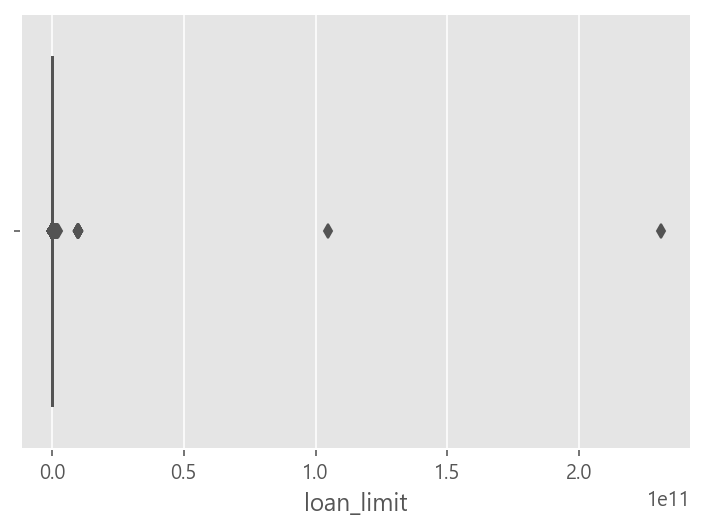

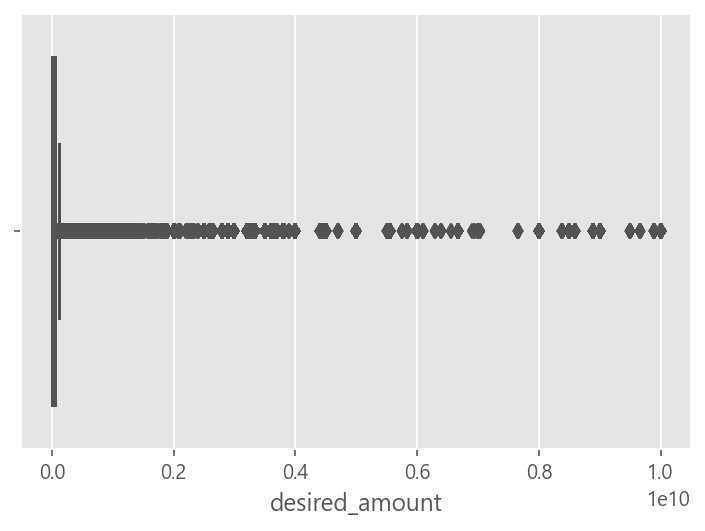

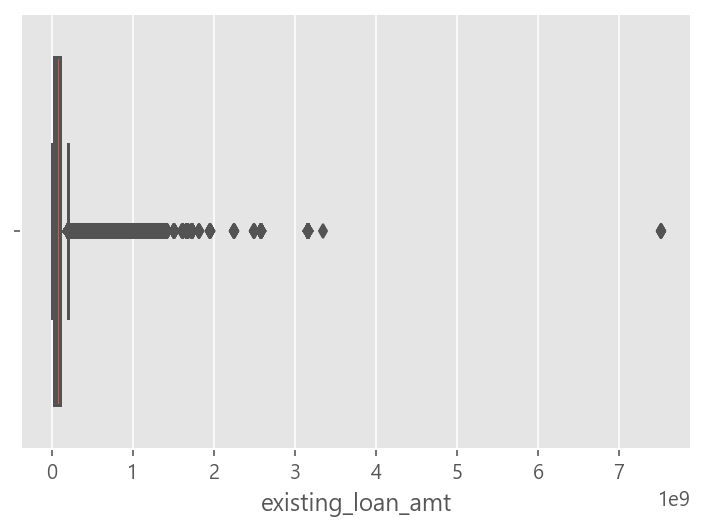

In [39]:
# 대출한도, 대출희망금액, 기대출금액 boxplot
sns.boxplot(x = "loan_limit",  data = data)
plt.show()
sns.boxplot(x = "desired_amount",  data = data)
plt.show()
sns.boxplot(x = "existing_loan_amt",  data = data)
plt.show()

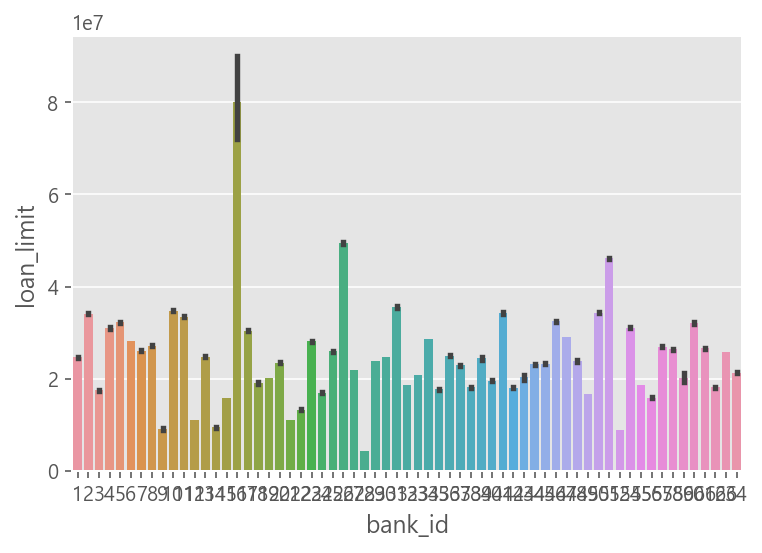

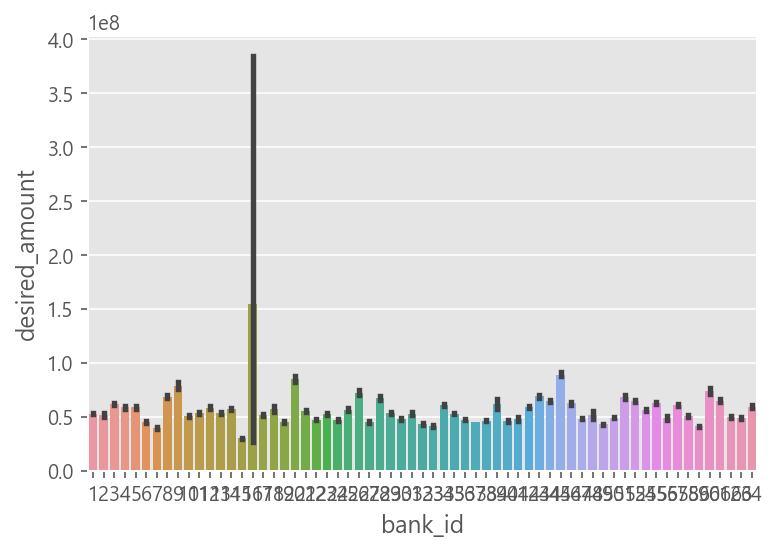

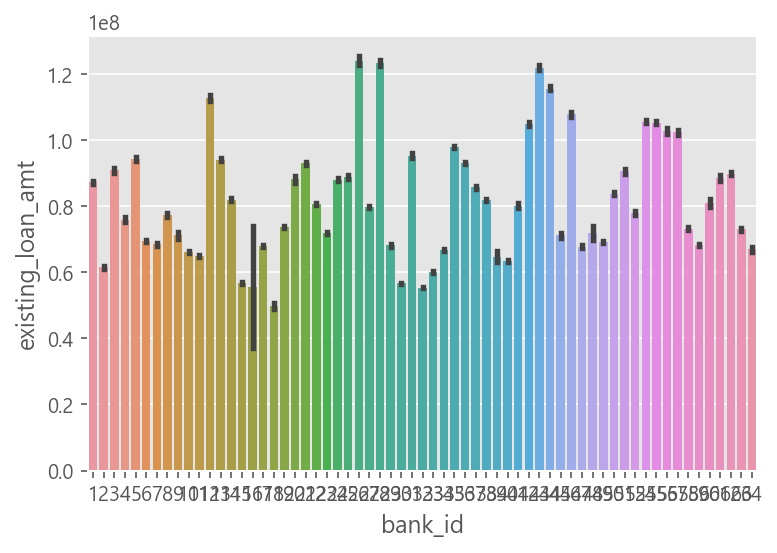

In [41]:
# 은행별 대출한도
sns.barplot(data=data, x="bank_id", y="loan_limit")
plt.show()
# 은행별 대출희망금액
sns.barplot(data=data, x="bank_id", y="desired_amount")
plt.show()
# 은행별 기대출금액
sns.barplot(data=data, x="bank_id", y="existing_loan_amt")
plt.show()

<AxesSubplot:xlabel='product_id', ylabel='existing_loan_amt'>

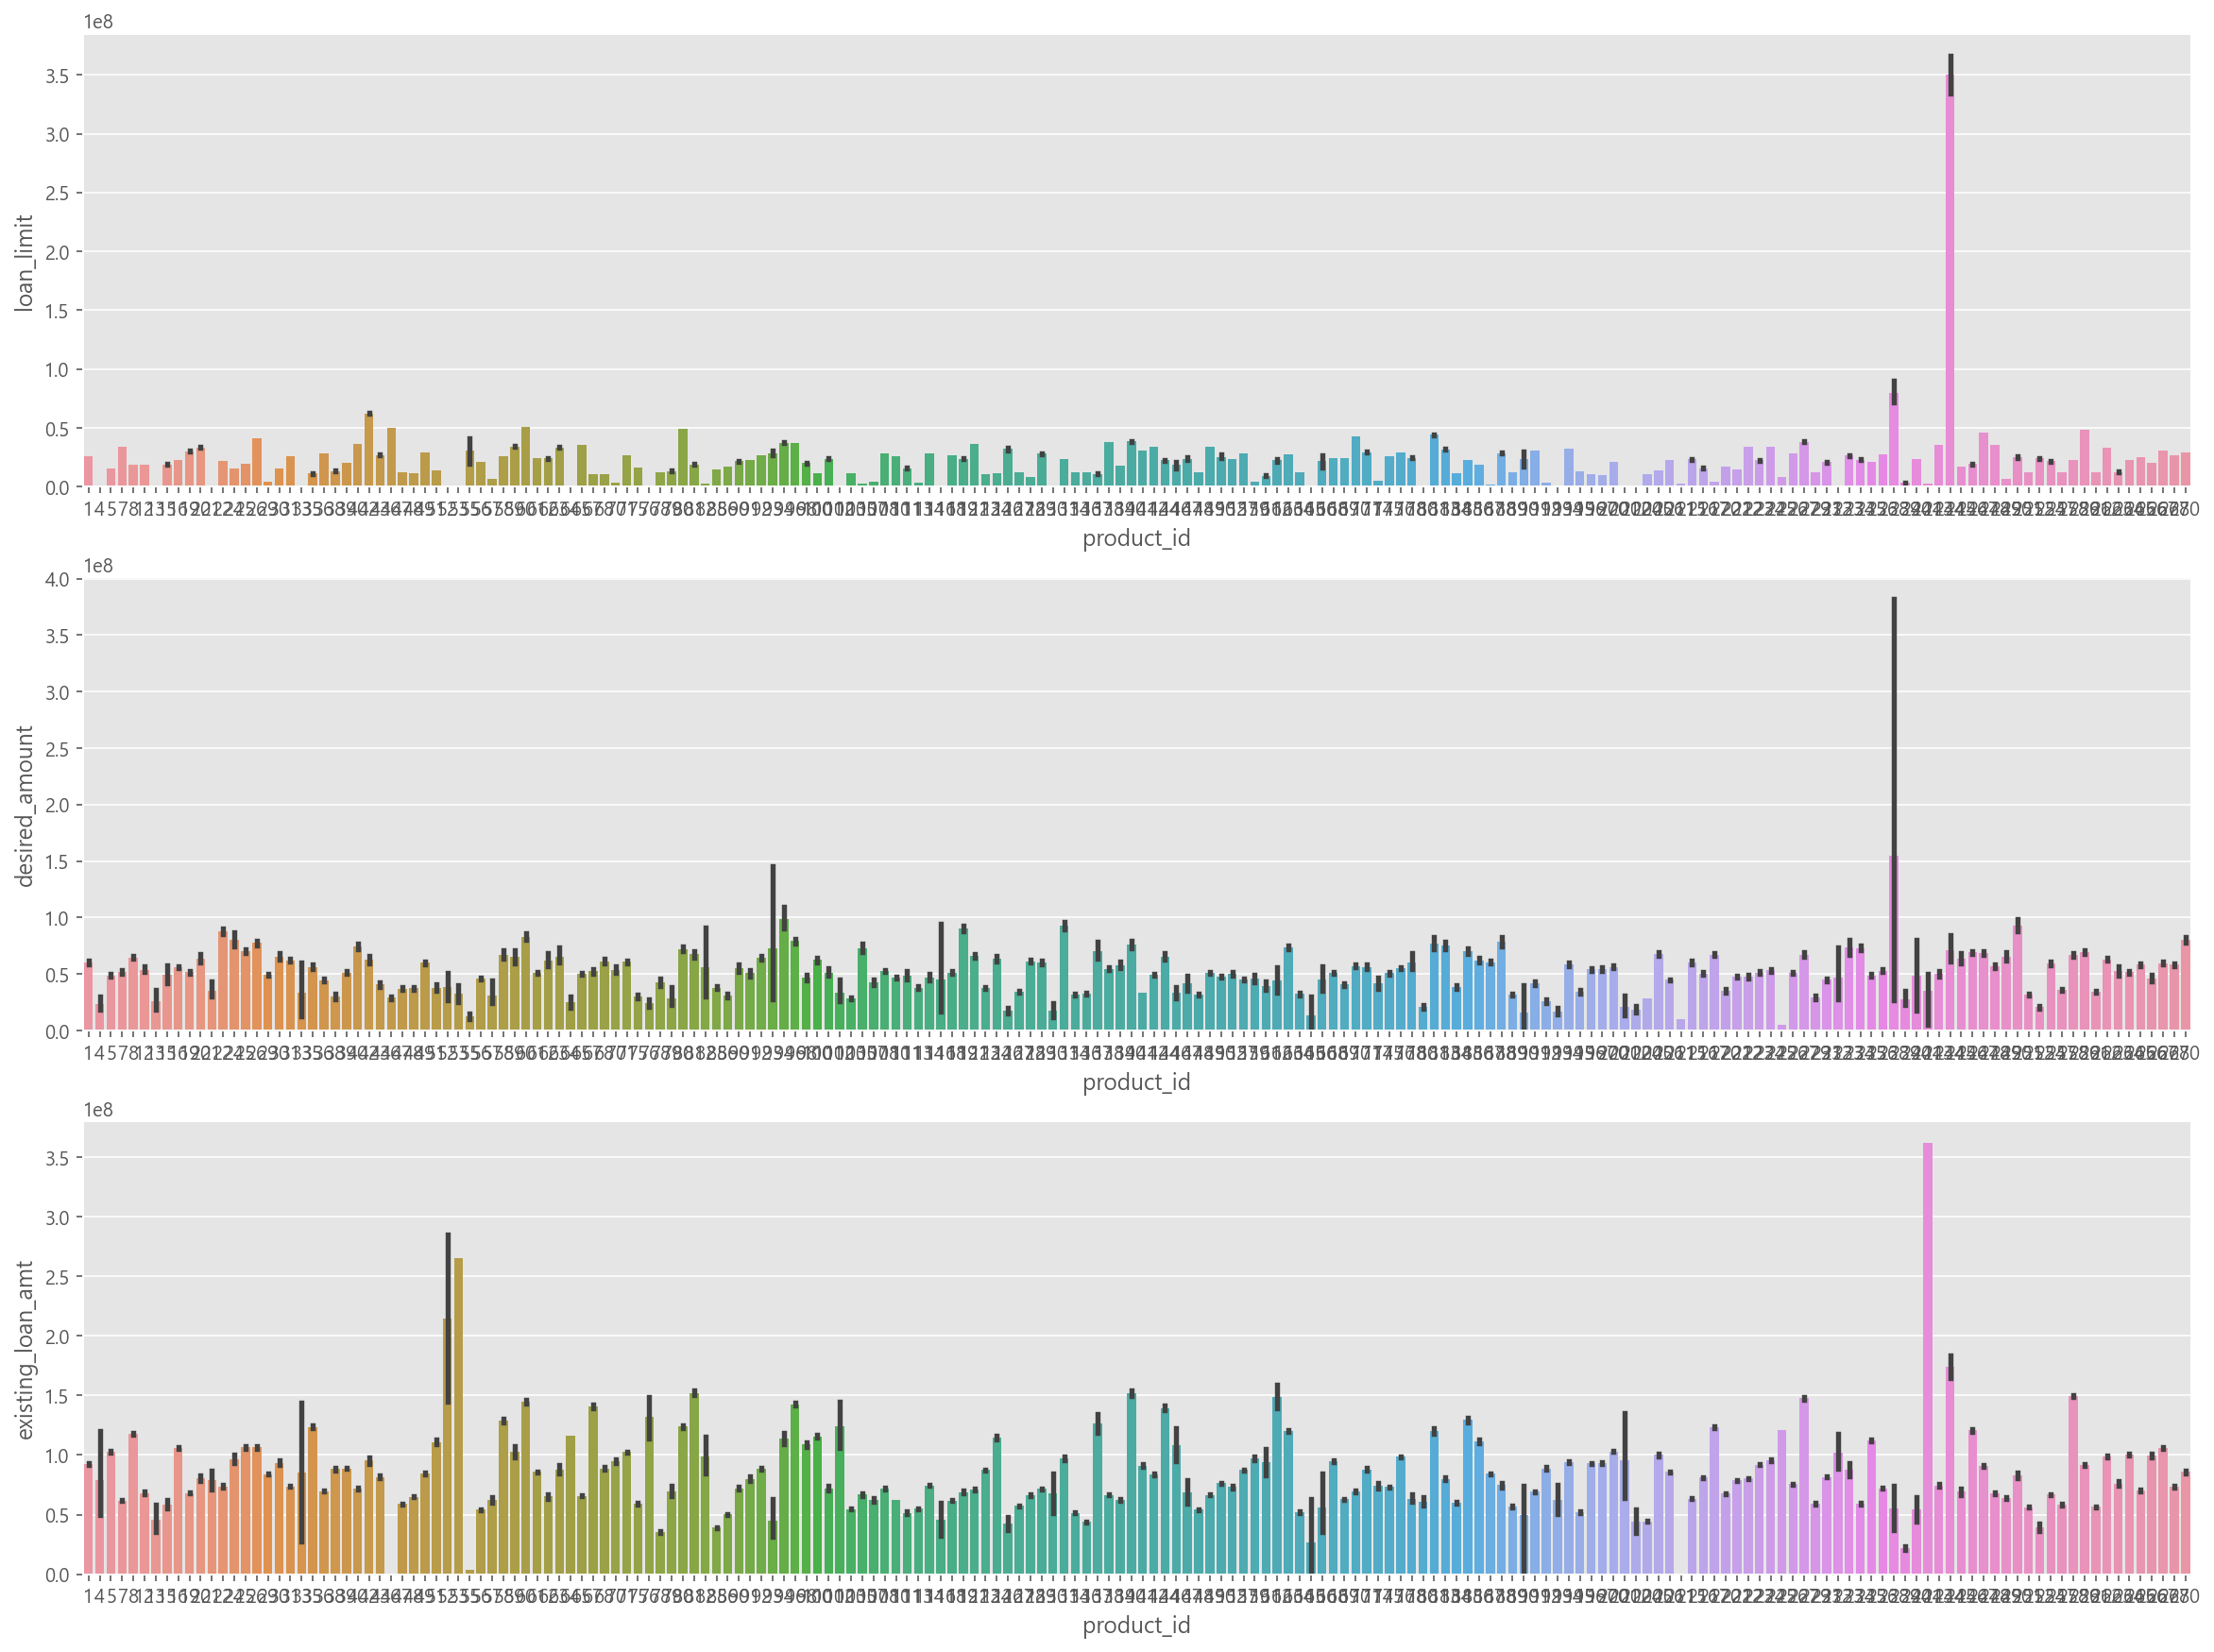

In [51]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,15))

# 상품별 대출한도
sns.barplot(data=data, x="product_id", y="loan_limit", ax = axes[0])
# 상품별 대출희망금액
sns.barplot(data=data, x="product_id", y="desired_amount", ax = axes[1])
# 상품별 기대출금액
sns.barplot(data=data, x="product_id", y="existing_loan_amt", ax = axes[2])

<AxesSubplot:xlabel='is_applied', ylabel='existing_loan_amt'>

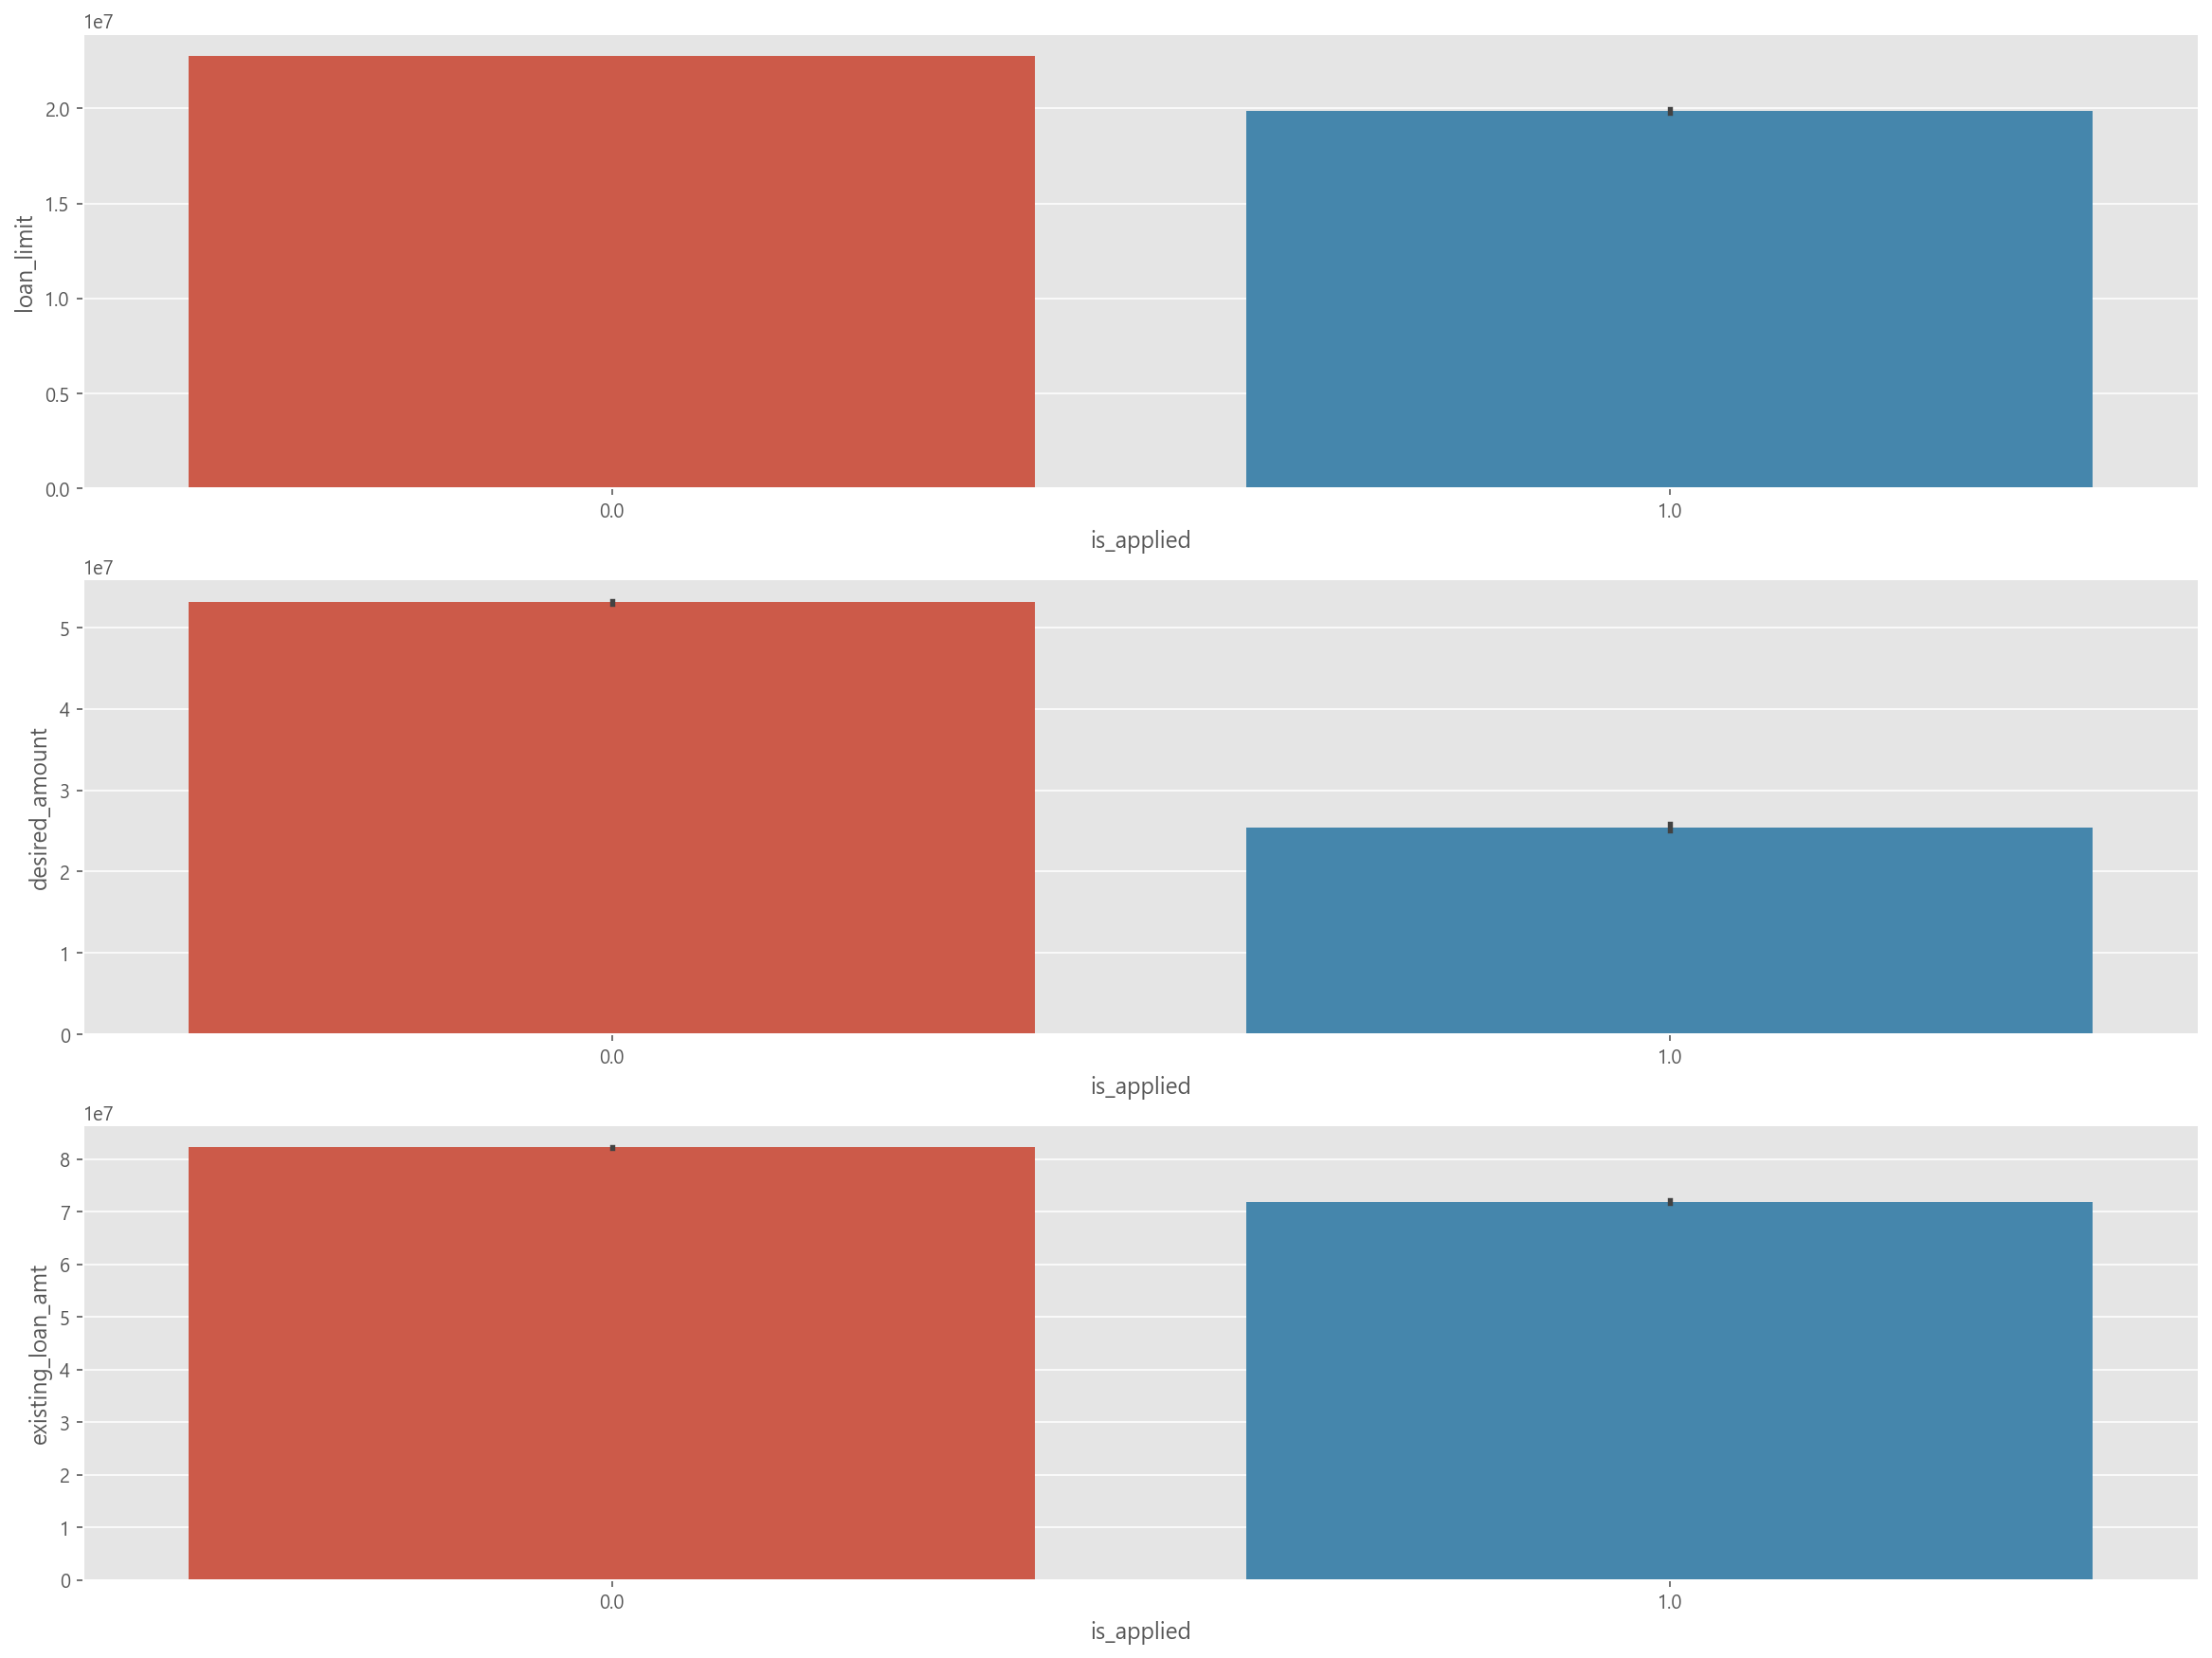

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,15))

# 대출여부별 대출한도
sns.barplot(data=data, x="is_applied", y="loan_limit", ax = axes[0])
# 대출여부별 대출희망금액
sns.barplot(data=data, x="is_applied", y="desired_amount", ax = axes[1])
# 대출여부별 기대출금액
sns.barplot(data=data, x="is_applied", y="existing_loan_amt", ax = axes[2])

<AxesSubplot:xlabel='gender', ylabel='existing_loan_amt'>

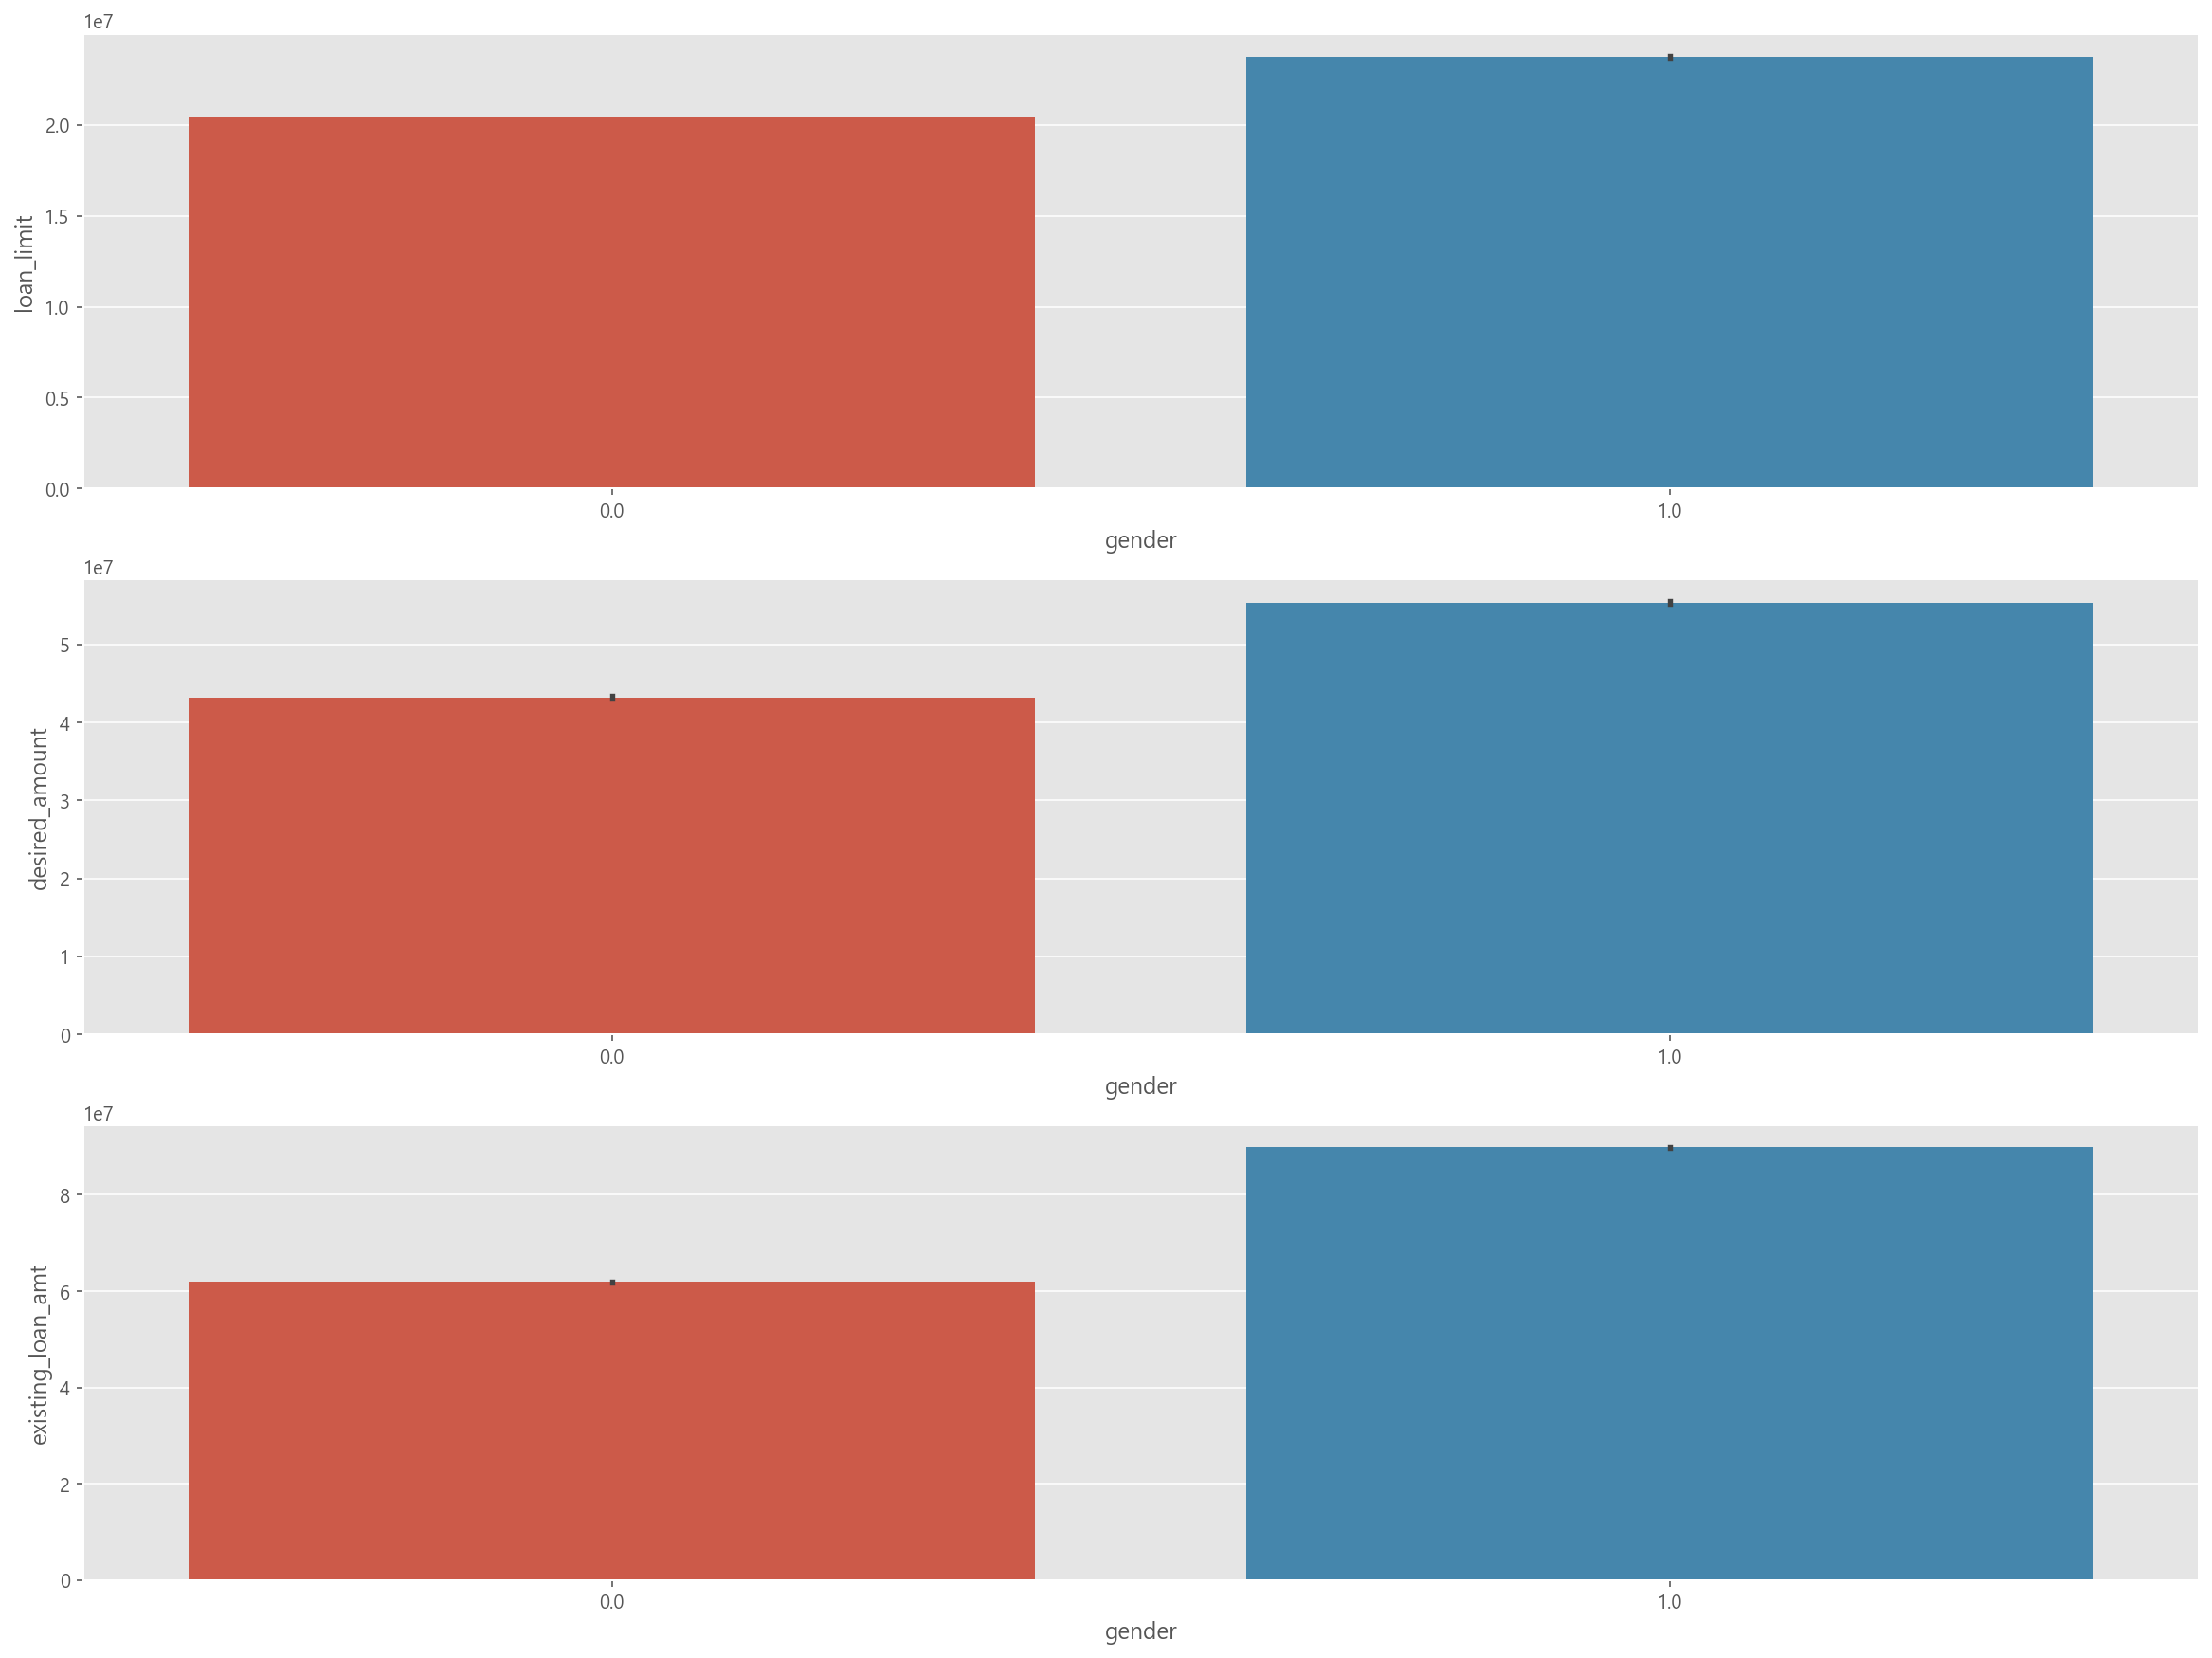

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,15))

# 성별 대출한도
sns.barplot(data=data, x="gender", y="loan_limit", ax = axes[0])
# 성별 대출희망금액
sns.barplot(data=data, x="gender", y="desired_amount", ax = axes[1])
# 성별 기대출금액
sns.barplot(data=data, x="gender", y="existing_loan_amt", ax = axes[2])

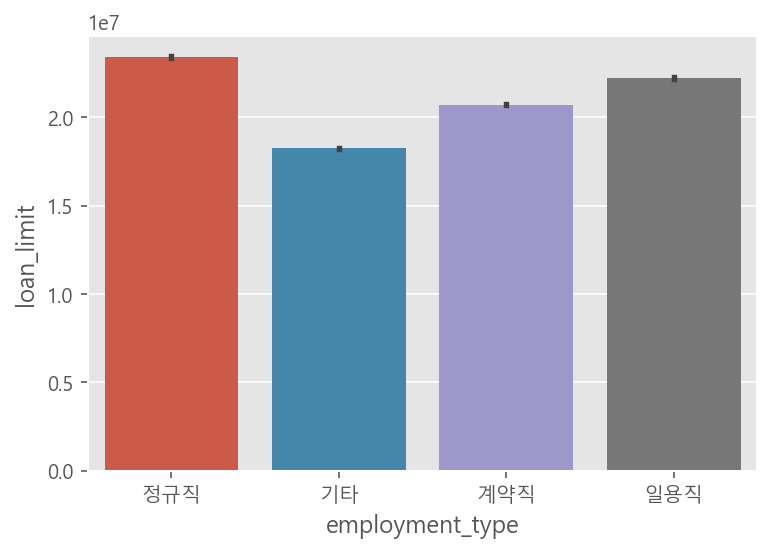

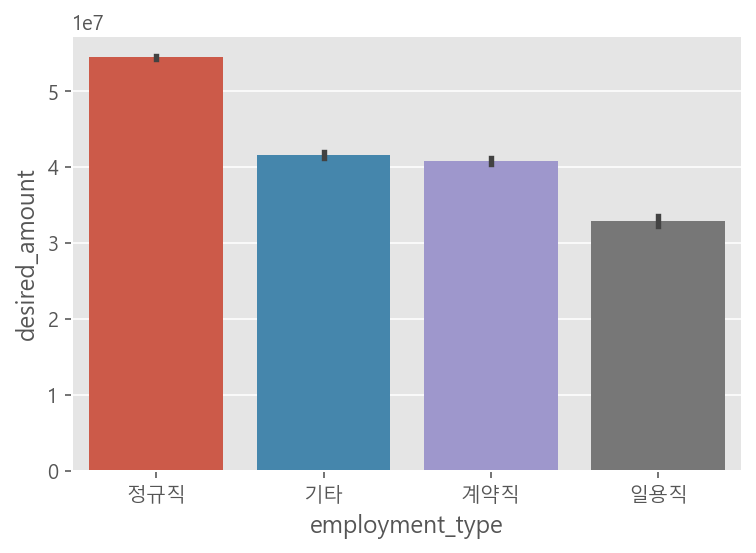

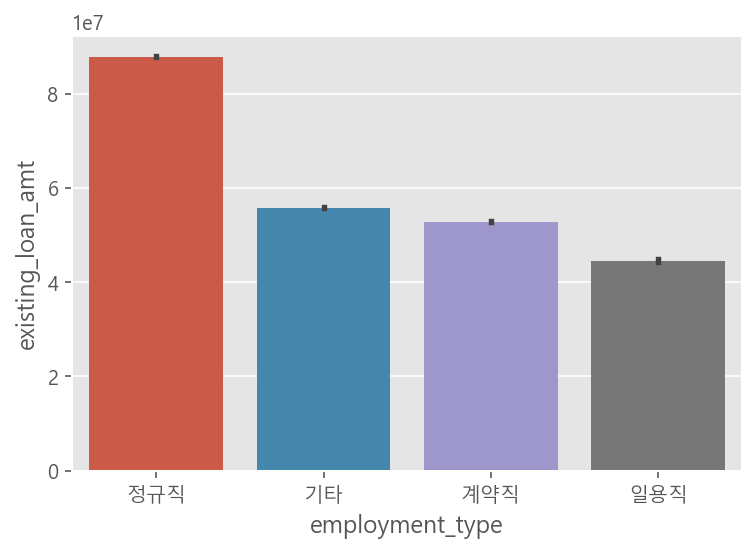

In [40]:
# 직종별 대출한도
sns.barplot(data=data, x="employment_type", y="loan_limit")
plt.show()
# 직종별 대출희망금액
sns.barplot(data=data, x="employment_type", y="desired_amount")
plt.show()
# 직종별 기대출금액
sns.barplot(data=data, x="employment_type", y="existing_loan_amt")
plt.show()

Text(0.5, 1.0, '기타')

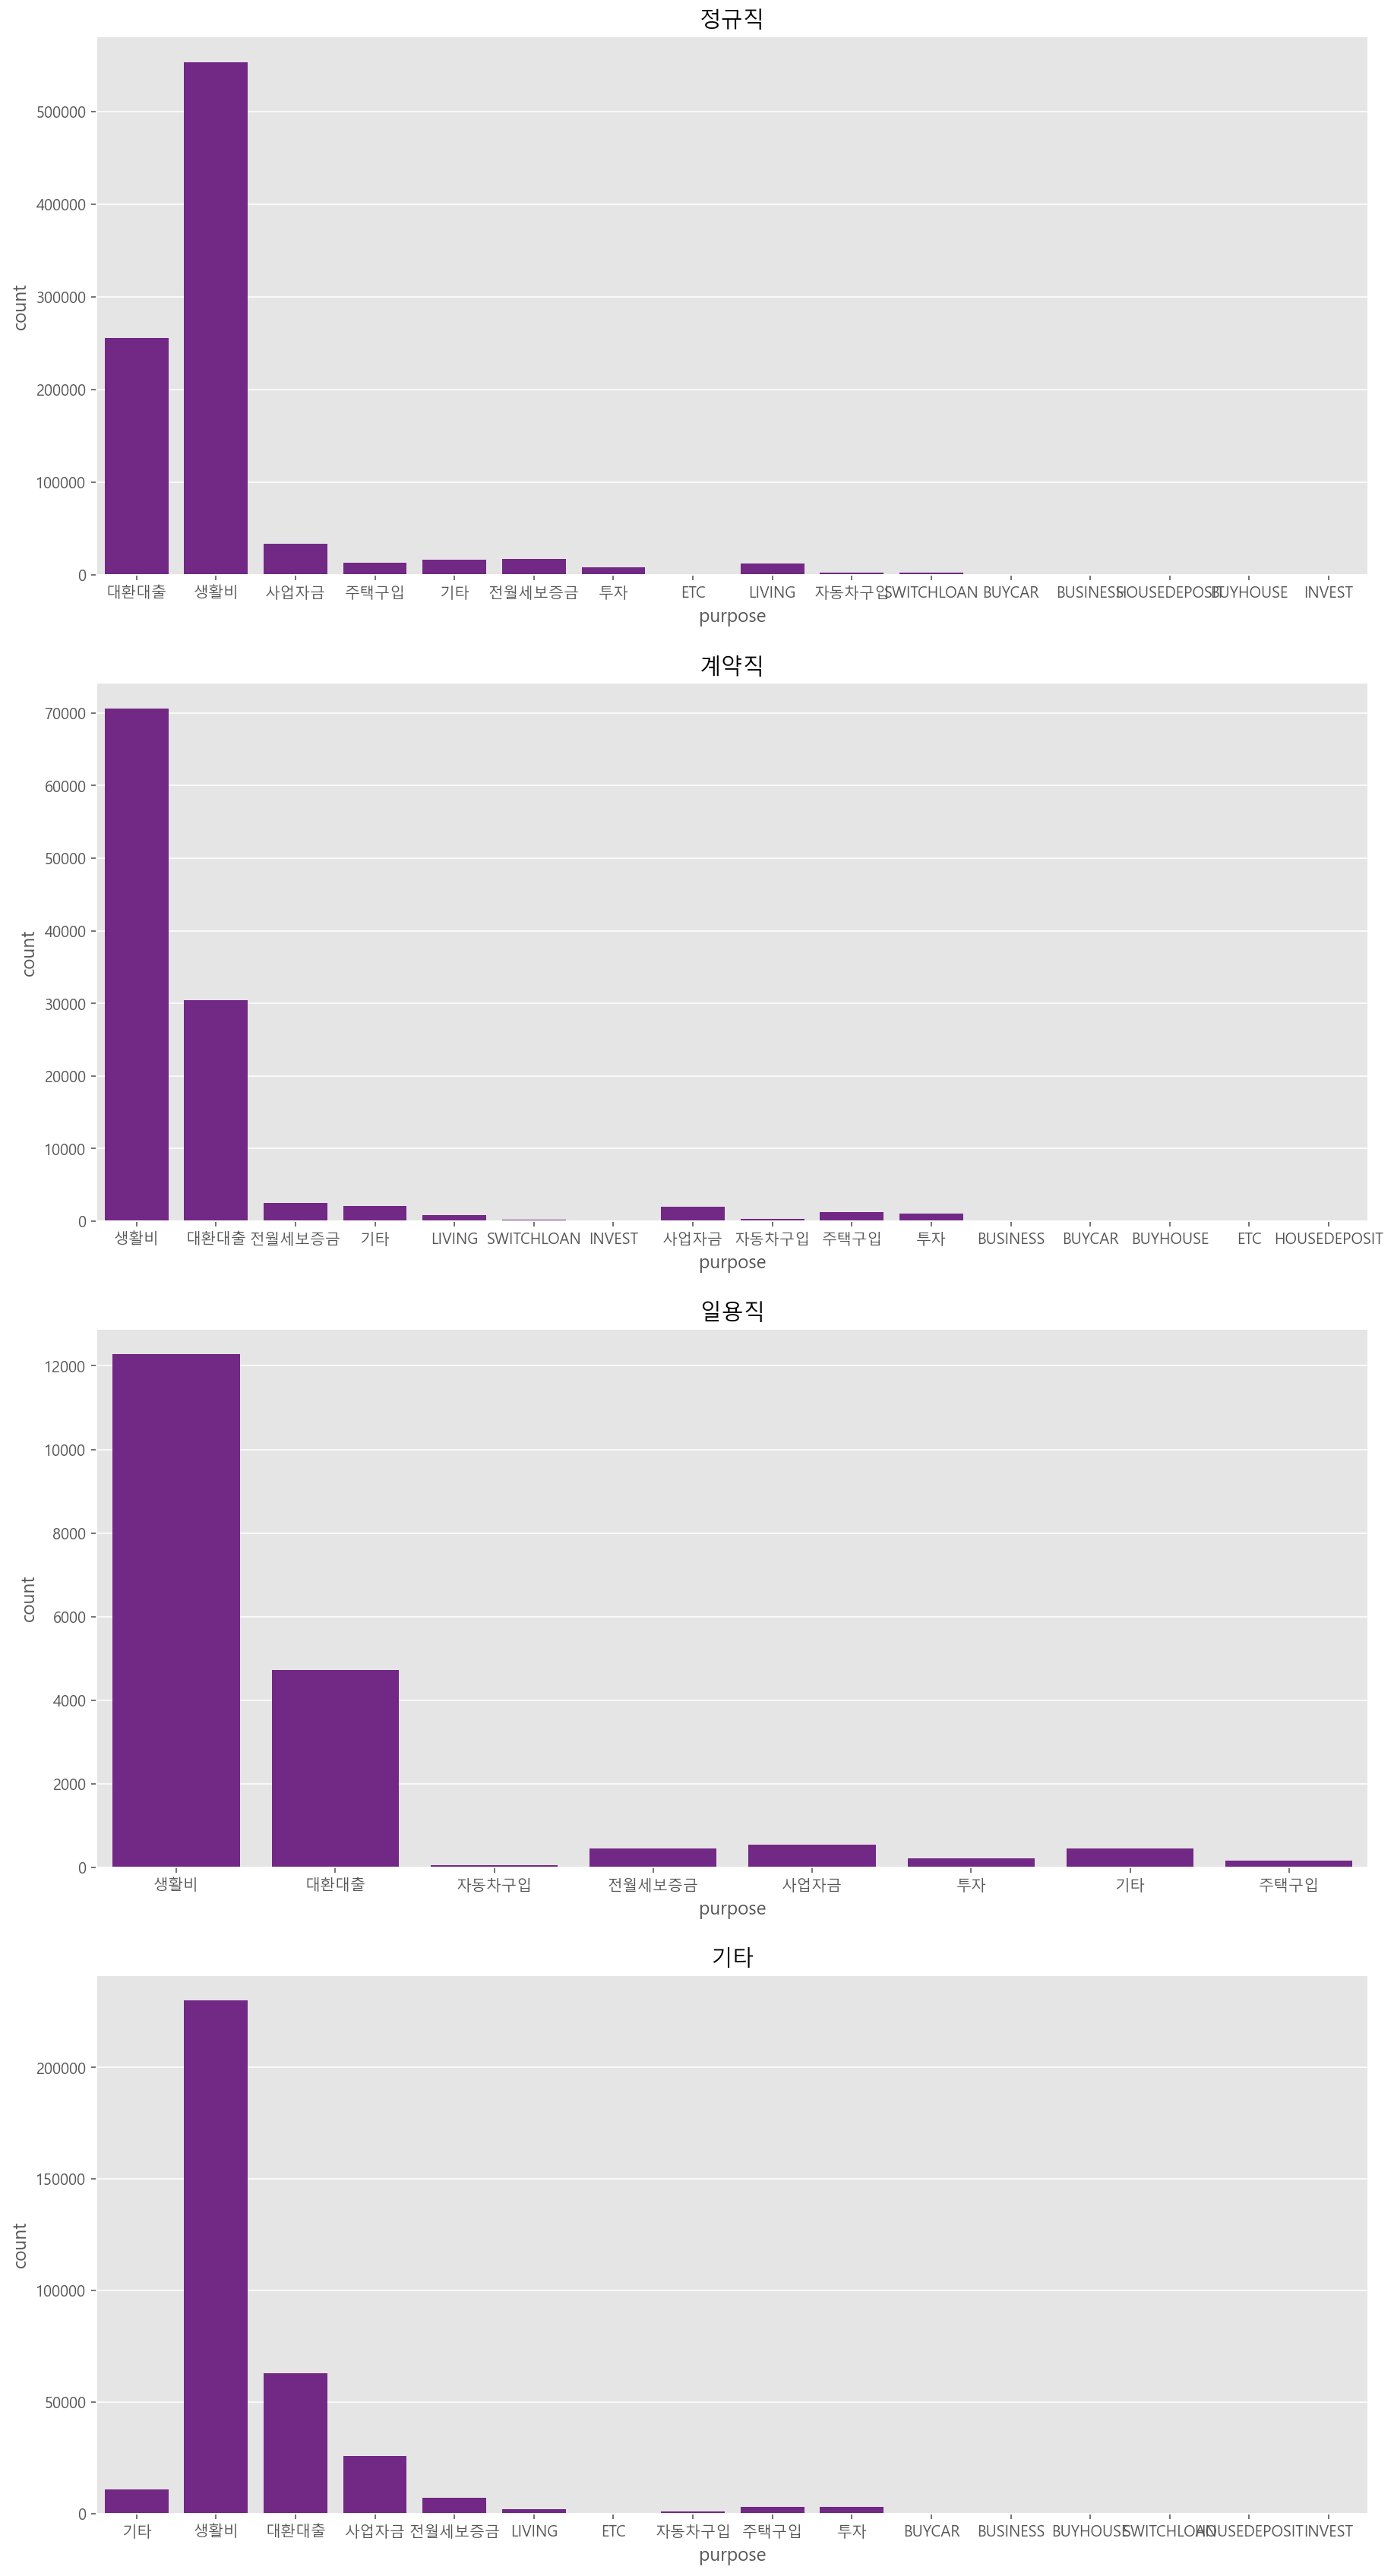

In [22]:
# 고용형태별 대출목적 시각화
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15,30))

sns.countplot(x="purpose", data=user[user['employment_type'] == "정규직"], color = "#7B1894", ax=ax[0])
ax[0].set_title("정규직")
sns.countplot(x="purpose", data=user[user['employment_type'] == "계약직"], color = "#7B1894", ax=ax[1])
ax[1].set_title("계약직")
sns.countplot(x="purpose", data=user[user['employment_type'] == "일용직"], color = "#7B1894", ax=ax[2])
ax[2].set_title("일용직")
sns.countplot(x="purpose", data=user[user['employment_type'] == "기타"], color = "#7B1894", ax=ax[3])
ax[3].set_title("기타")


Text(0.5, 1.0, '기타')

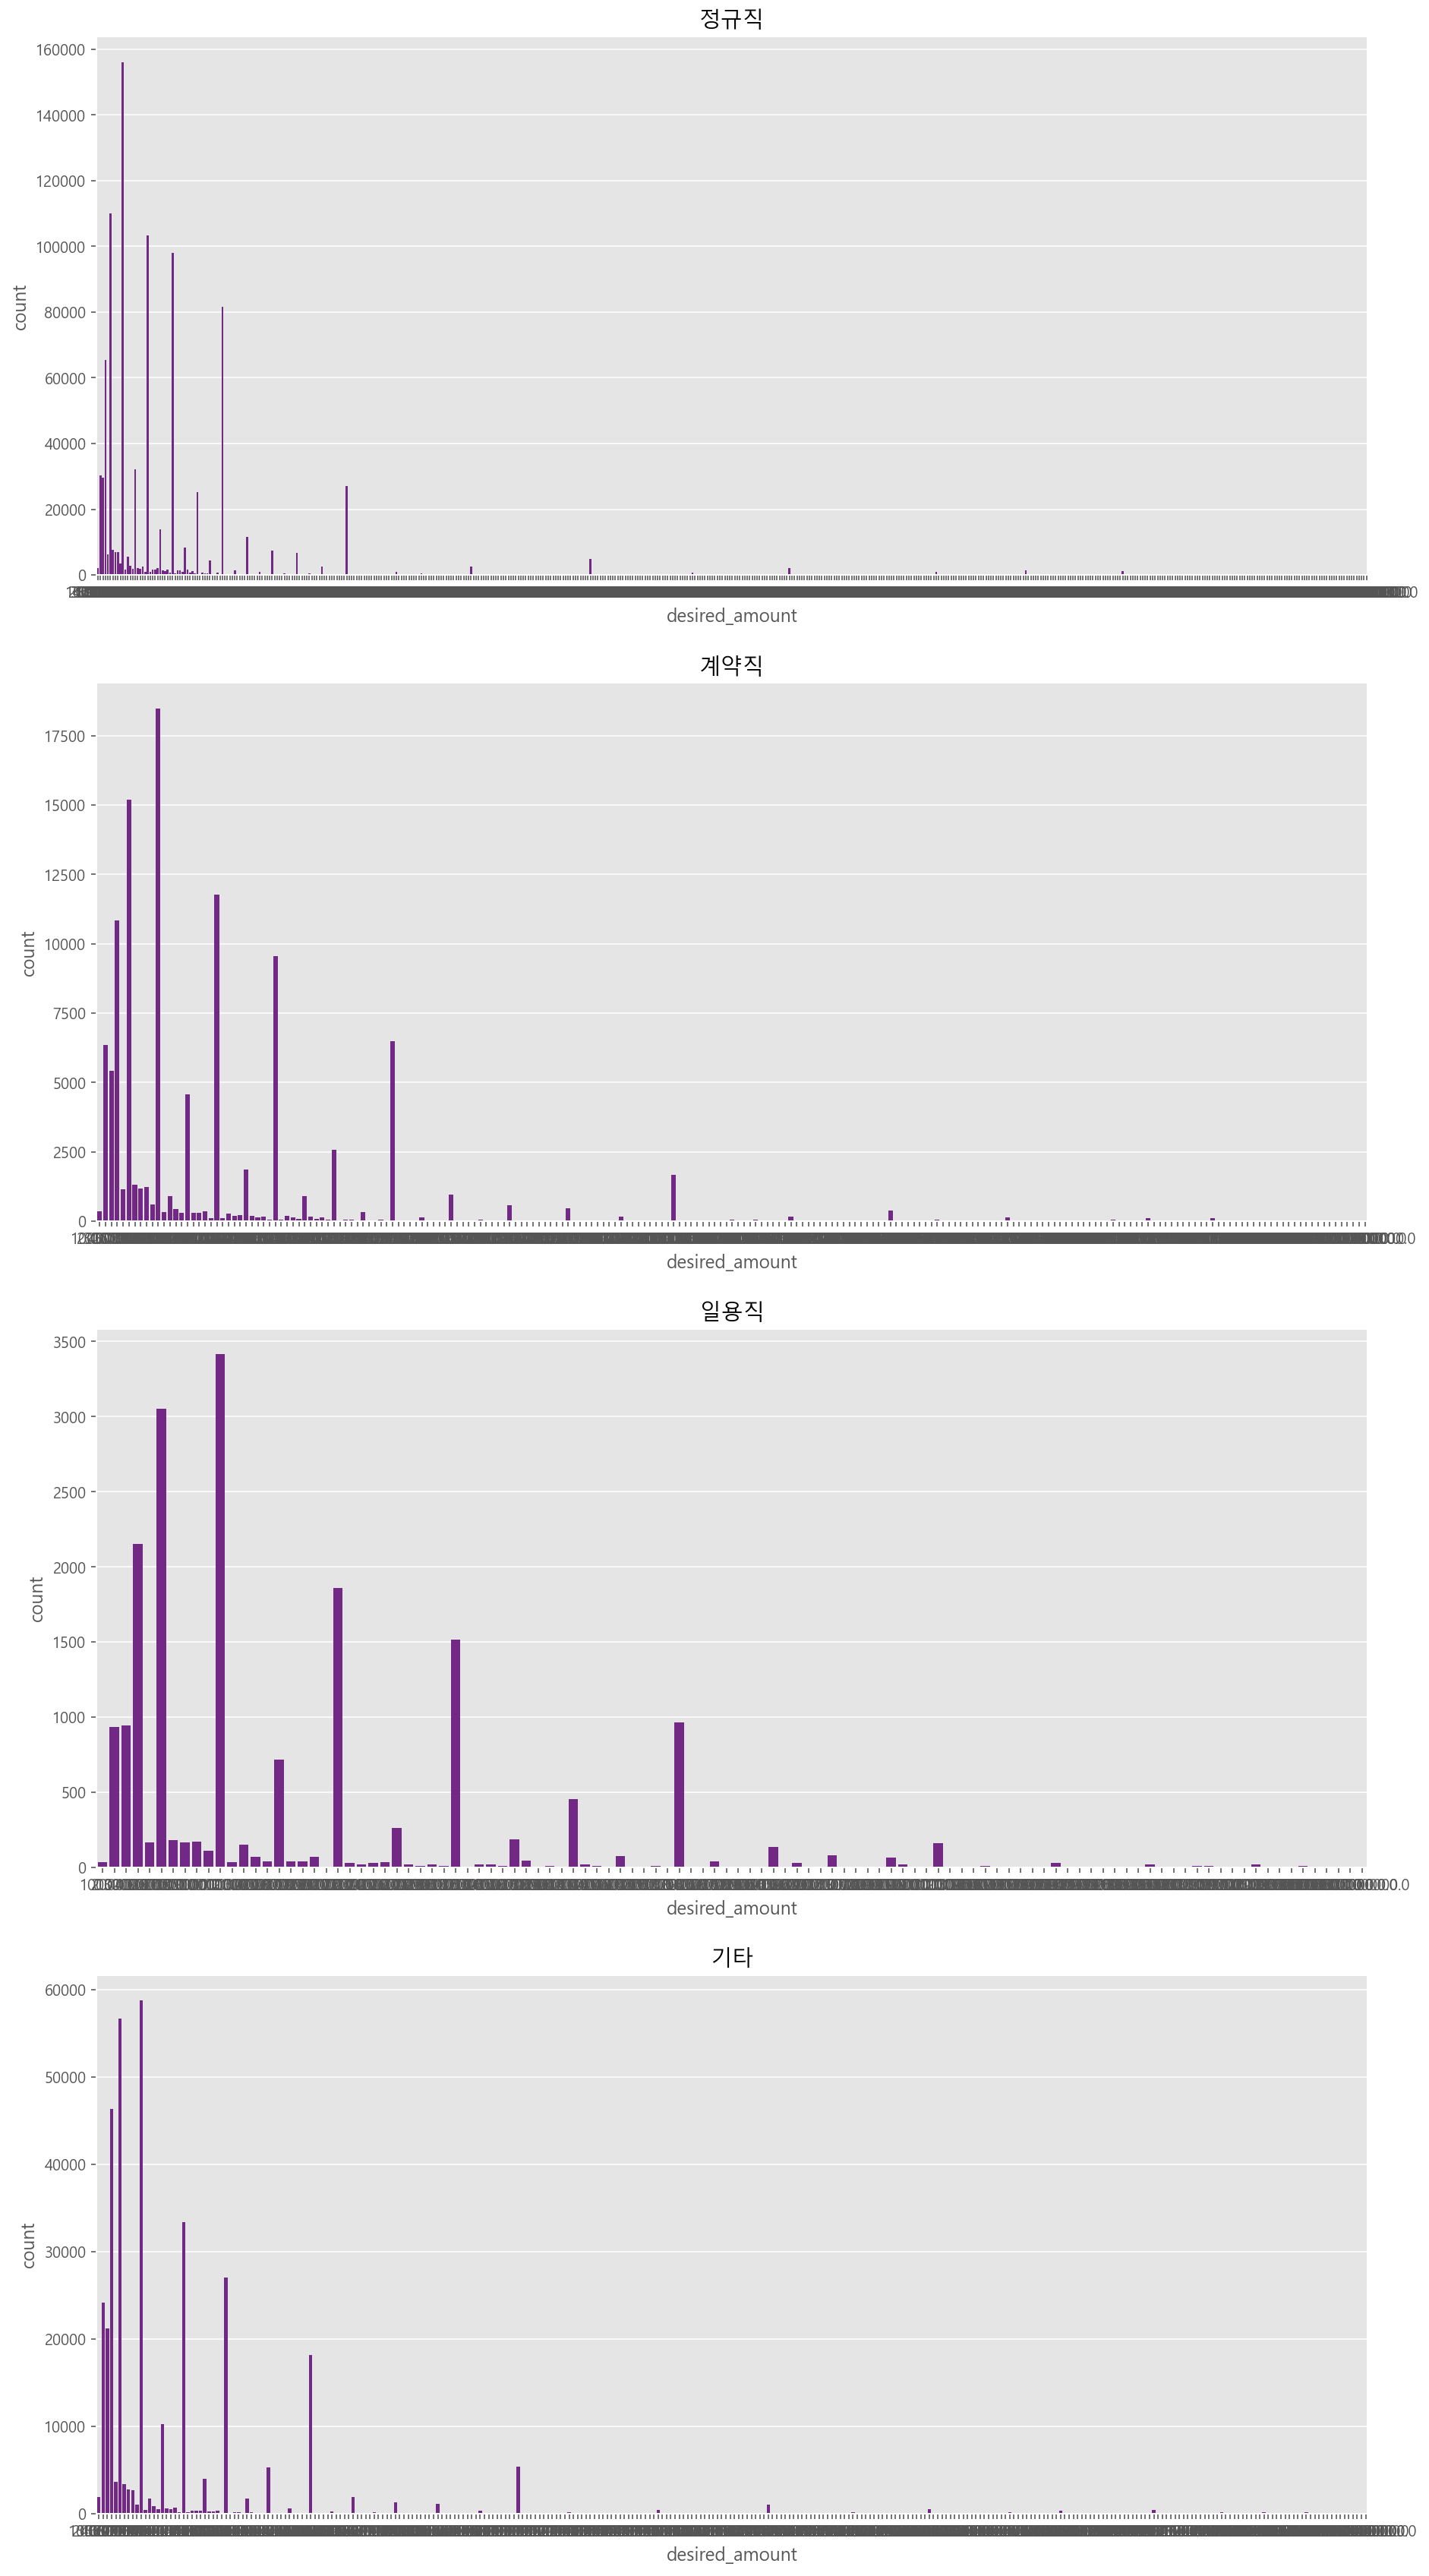

In [41]:
# 고용형태별 대출희망금액 시각화
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15,30))

sns.countplot(x="desired_amount", data=user[user['employment_type'] == "정규직"], color = "#7B1894", ax=ax[0])
ax[0].set_title("정규직")
sns.countplot(x="desired_amount", data=user[user['employment_type'] == "계약직"], color = "#7B1894", ax=ax[1])
ax[1].set_title("계약직")
sns.countplot(x="desired_amount", data=user[user['employment_type'] == "일용직"], color = "#7B1894", ax=ax[2])
ax[2].set_title("일용직")
sns.countplot(x="desired_amount", data=user[user['employment_type'] == "기타"], color = "#7B1894", ax=ax[3])
ax[3].set_title("기타")

In [37]:
log["event"].value_counts()
# OpenApp - 핀다 앱 실행
# EndLoanApply - 한도조회 결과 확인
# GetCreditInfo - KCB 신용정보 조회(?)
# Login - 핀다 앱 로그인
# StartLoanApply - 한도조회 시작하기 버튼 클릭
# ViewLoanApplyIntro - 한도조회 인트로 페이지 조회
# UseLoanManage - 대출관리 서비스 이용
# CompleteIDCertification - 본인인증완료
# SignUp - 회원가입
# UsePrepayCalc - 여윳돈 계산기 서비스 이용
# UseDSRCalc - DSR 계산기 서비스 이용

# openapp
# start

OpenApp                    3460762
EndLoanApply               2715253
GetCreditInfo              2661997
Login                      2463755
StartLoanApply             1893914
ViewLoanApplyIntro         1804712
UseLoanManage              1558906
CompleteIDCertification    1237777
SignUp                       34892
UsePrepayCalc                 7360
UseDSRCalc                    4665
Name: event, dtype: int64

In [38]:
# 대출X 대출O 건수
loan.is_applied.value_counts()

0.0    9709675
1.0     560449
Name: is_applied, dtype: int64

In [47]:
loan.bank_id.value_counts()

35    841690
38    630419
59    472426
33    435140
10    415401
       ...  
60     40001
9      25766
48     10254
39      9229
16         5
Name: bank_id, Length: 63, dtype: int64

In [15]:
# 성별 고용형태
pd.crosstab(user['gender'], user['employment_type'])

employment_type,계약직,기타,일용직,정규직
gender,,,,
0.0,36200,143537,3034,264134
1.0,74405,197769,15640,646453


In [58]:
# 조회/고객 비율
# 고객한명당 3번 정도 대출 조회 함
round(data['application_id'].nunique()/data['user_id'].nunique(),2)

3.05

In [59]:
# 상품/은행 비율
# 은행 하나당 상품 3개정도
round(data['product_id'].nunique()/data['bank_id'].nunique(),2)

2.98

### 대출O, X 차이 - 고객

In [49]:
# 대출 고객 filtering
loan_false = data[data['apply'] == 0]
loan_true = data[data['apply'] == 1]

In [30]:
# 대출 신청한 고객 수 차이
user.groupby("apply")['user_id'].agg("count")

apply
0    1016660
1     377556
Name: user_id, dtype: int64

In [21]:
# 신용점수
user.groupby("apply")['credit_score'].agg('mean')

apply
0    631.751790
1    656.927101
Name: credit_score, dtype: float64

In [23]:
# 연소득
user.groupby("apply")['yearly_income'].agg('mean').astype(int)

apply
0    43184185
1    44177740
Name: yearly_income, dtype: int32

In [24]:
# 대출희망금액
# 대출 신청한 쪽이 대출희망금액이 더 낮음
user.groupby("apply")['desired_amount'].agg('mean').astype(int)

apply
0    32171141
1    25658000
Name: desired_amount, dtype: int32

In [26]:
# 금리
user.groupby("apply")['existing_loan_cnt'].agg('mean')

apply
0    4.760082
1    4.698608
Name: existing_loan_cnt, dtype: float64

In [27]:
# 기대출금액
user.groupby("apply")['existing_loan_amt'].agg('mean').astype(int)

apply
0    70295742
1    71968775
Name: existing_loan_amt, dtype: int32

In [8]:
# 대출여부, 성별 갯수
pd.crosstab(user['apply'], user['gender'])

gender,0.0,1.0
apply,,
0,323879,682655
1,123055,251666


In [45]:
# 성별 연소득 평균
# 1번이 남자인듯
pd.crosstab(user['apply'], user['gender'], user.yearly_income, aggfunc = 'mean').astype(int)

gender,0.0,1.0
apply,,
0,36856658,46246335
1,39174848,46601122


### 대출O, X 차이 - is_applied

In [64]:
# 금리 차이
data.groupby("is_applied")['loan_rate'].agg(np.mean)

is_applied
0.0    12.814556
1.0    11.913990
Name: loan_rate, dtype: float64

In [66]:
# 대출 한도 차이
data.groupby("is_applied")['loan_limit'].agg(np.mean).astype(int)

is_applied
0.0    22764949
1.0    19865883
Name: loan_limit, dtype: int32

In [104]:
# 많이 신청한 은행 순 - 대출True순 정렬
pd.crosstab(data['is_applied'], data['bank_id'], margins = True).iloc[:,:-1].sort_values(by = 1.0, axis = 1, ascending = False)

bank_id,59,29,49,38,62,35,27,1,36,4,...,26,20,46,51,12,61,39,9,28,16
is_applied,,,,,,,,,,,,,,,,,,,,,
0.0,337725,136326,282228,468029,192935,581644,254866,260991,274101,56668,...,56725,36574,113802,56871,70479,50973,6532,3766,94101,1
1.0,39225,38721,34081,23731,19407,19356,19342,19286,18601,14130,...,1610,1556,1415,1183,1001,546,387,216,185,4
All,376950,175047,316309,491760,212342,601000,274208,280277,292702,70798,...,58335,38130,115217,58054,71480,51519,6919,3982,94286,5


In [105]:
# 많이 신청한 상품 순 - 대출True순 정렬
# 29번 은행 상품 - 265, 75, 20, 180
pd.crosstab(data['is_applied'], data['product_id'], margins = True).iloc[:,:-1].sort_values(by = 1.0, axis = 1, ascending = False)

product_id,265,251,136,200,61,36,261,142,150,196,...,238,190,147,240,165,225,55,53,166,211
is_applied,,,,,,,,,,,,,,,,,,,,,
0.0,118220,124835,72830,120715,199879,196977,90607,172461,212890,155914,...,1,1,288,1,0,0,1,0,11,1
1.0,29290,27698,22369,15922,15690,13856,12458,11941,11527,11089,...,4,4,3,3,3,1,1,1,1,0
All,147510,152533,95199,136637,215569,210833,103065,184402,224417,167003,...,5,5,291,4,3,1,2,1,12,1


In [107]:
data[data['bank_id'] == 59]['product_id'].unique()

array([150, 251], dtype=int64)

In [109]:
data[data['bank_id'] == 29]['product_id'].unique()

array([265,  75,  20, 180], dtype=int64)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13527250 entries, 0 to 13527249
Data columns (total 24 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   application_id                       int64  
 1   loanapply_insert_time                object 
 2   bank_id                              int64  
 3   product_id                           int64  
 4   loan_limit                           float64
 5   loan_rate                            float64
 6   is_applied                           float64
 7   user_id                              int64  
 8   birth_year                           float64
 9   gender                               float64
 10  insert_time                          object 
 11  credit_score                         float64
 12  yearly_income                        float64
 13  income_type                          object 
 14  company_enter_month                  float64
 15  employment_type               

## 모델링

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [8]:
data = pd.merge(loan, user, on = 'application_id')

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.3, random_state=777, data = data)

NameError: name 'x_data' is not defined